## credit card fraud detection

### problem statement

create a accurate model to find out the credit card fraud .


In [1]:
## required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
## reading dataset
df = pd.read_csv('creditcard.csv')

## displaying first five rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
## shape of dataset
df.shape

(284807, 31)

In [4]:
## checking null values 
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
## count the occurance of unique values in class column. class is our target variable.
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

C:\Users\hp\.conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


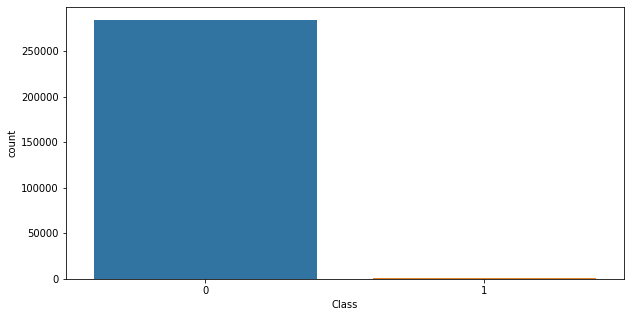

In [6]:
## countplot of classes
plt.figure(figsize=(10, 5))
sns.countplot(df['Class']);

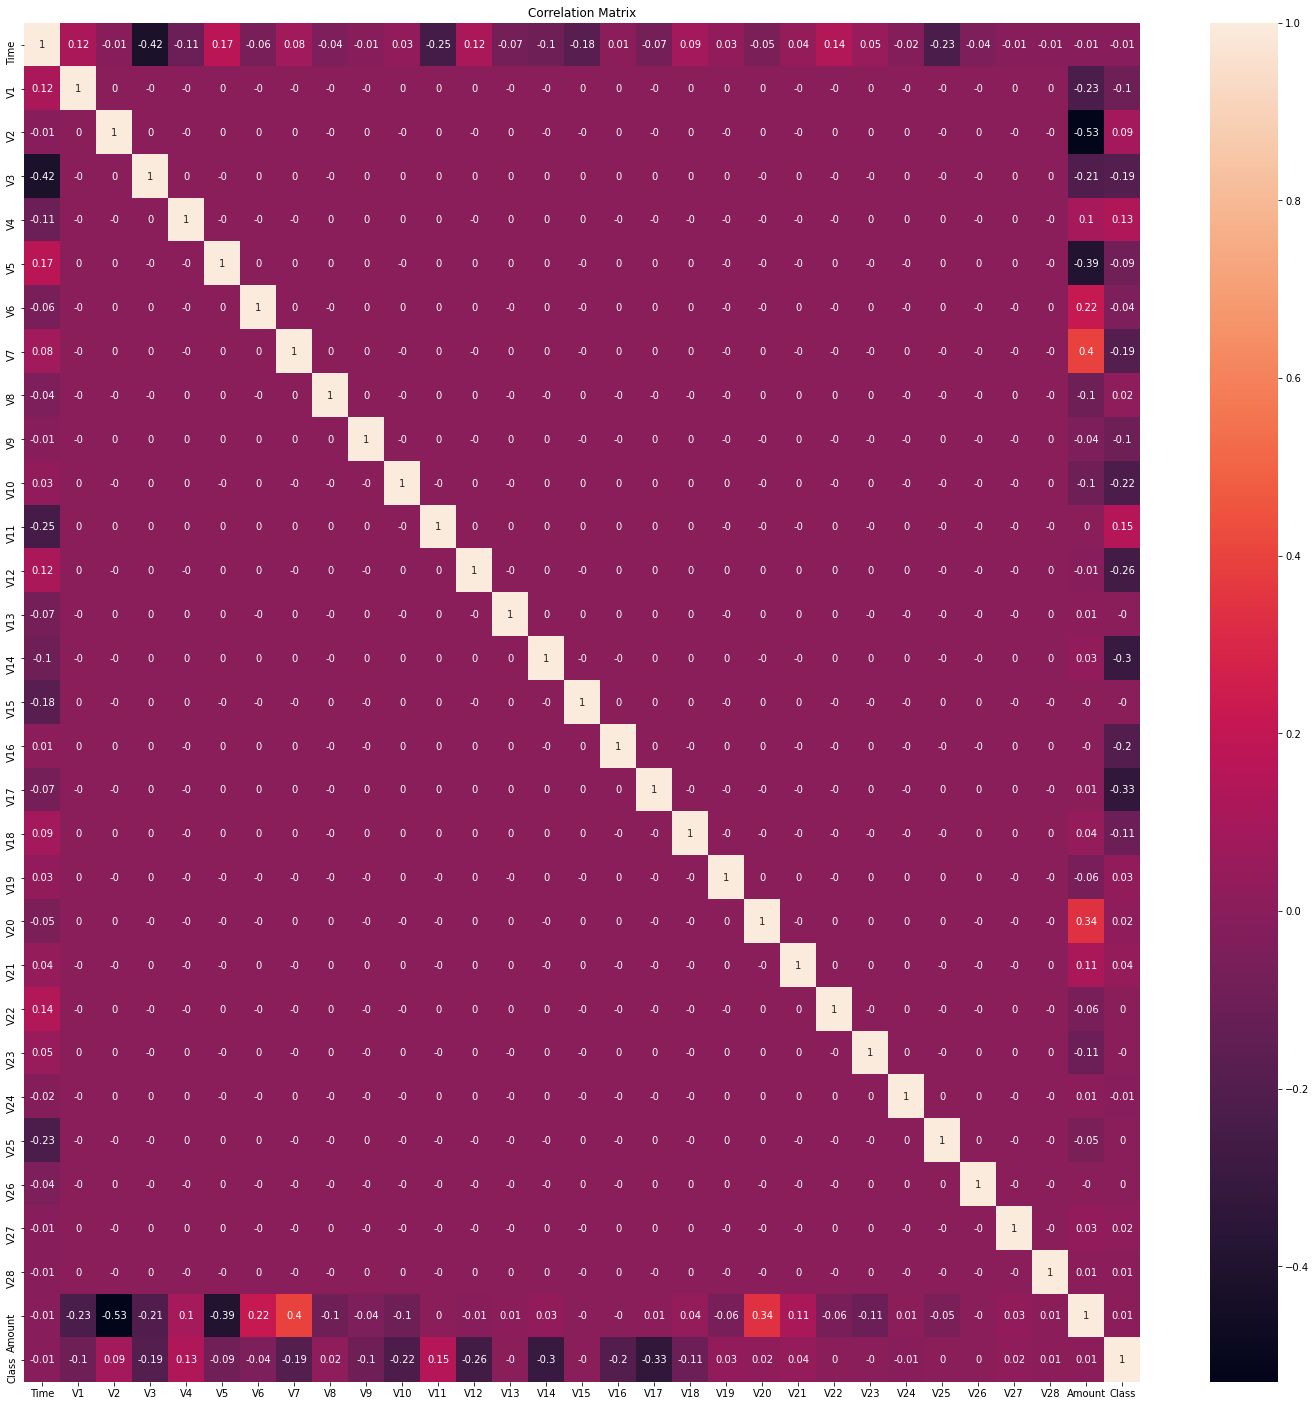

In [7]:
## checking correlation
plt.figure(figsize=(25,25))
plt.title("Correlation Matrix")
sns.heatmap(round(df.corr(), 2), annot=True);

In [8]:
## checking correlation of 'dependent' variable with each "independent" variable
df.corr()[['Class']].sort_values(by='Class')[:-1]

,Class
V17,-0.326481
V14,-0.302544
V12,-0.260593
V10,-0.216883
V16,-0.196539
V3,-0.192961
V7,-0.187257
V18,-0.111485
V1,-0.101347
V9,-0.097733


In [9]:
## dependent and independent variables 
x =df.drop(['Class'],axis=1)
y =df[['Class']]

In [10]:
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [11]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


## train test split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [13]:
#Applying Mutual info classifier to get Important Features
from sklearn.feature_selection import mutual_info_classif
# measure of how much information the presence of one variable gives about the other variable. 
mutual_info=mutual_info_classif(x_train,y_train)
mutual_info

C:\Users\hp\.conda\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.00194855, 0.00230288, 0.00327254, 0.00489097, 0.00501739,
       0.00252965, 0.00236347, 0.00388293, 0.0020805 , 0.00424456,
       0.00747044, 0.00691841, 0.00765501, 0.00047533, 0.00812684,
       0.00034204, 0.00619611, 0.00835388, 0.00431406, 0.00143742,
       0.00128833, 0.00262494, 0.00052993, 0.00089544, 0.00073904,
       0.00062284, 0.00060485, 0.00243427, 0.00180682, 0.00137573])

In [14]:
#convert array to series
mutual_info=pd.Series(mutual_info)
mutual_info.index=x_train.columns
mutual_info.sort_values(ascending=False)

V17       0.008354
V14       0.008127
V12       0.007655
V10       0.007470
V11       0.006918
V16       0.006196
V4        0.005017
V3        0.004891
V18       0.004314
V9        0.004245
V7        0.003883
V2        0.003273
V21       0.002625
V5        0.002530
V27       0.002434
V6        0.002363
V1        0.002303
V8        0.002080
Time      0.001949
V28       0.001807
V19       0.001437
Amount    0.001376
V20       0.001288
V23       0.000895
V24       0.000739
V25       0.000623
V26       0.000605
V22       0.000530
V13       0.000475
V15       0.000342
dtype: float64

In [15]:
#select how much feature we want
from sklearn.feature_selection import SelectKBest

In [16]:
#select top 10 features
sel_col=SelectKBest(mutual_info_classif,k=10)
sel_col.fit(x_train,y_train)
x_train.columns[sel_col.get_support()]

C:\Users\hp\.conda\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Index(['V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18'], dtype='object')

In [17]:
# dropping less important features from predictor variables.
x_train=x_train.drop(['V1','V2','V5','V5','V6','V7','V8','V13','V15','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28'],axis=1)

In [18]:
x_test=x_test.drop(['V1','V2','V5','V5','V6','V7','V8','V13','V15','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28'],axis=1)

In [20]:
print(x_train.shape)
print(x_test.shape)

(213605, 12)
(71202, 12)


## Logistic Regression

In [21]:
lg = LogisticRegression()

## fit on training data
lg.fit(x_train, y_train)

C:\Users\hp\.conda\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\.conda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.87      0.56      0.68       120

    accuracy                           1.00     71202
   macro avg       0.93      0.78      0.84     71202
weighted avg       1.00      1.00      1.00     71202



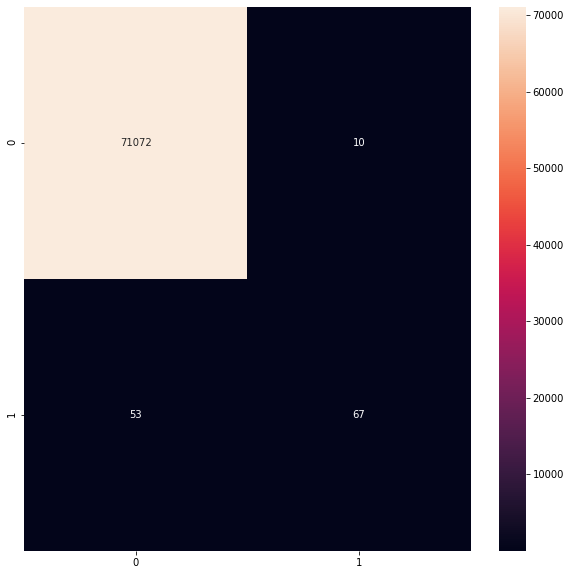

In [27]:
## prediction
pred = lg.predict(x_test)

print('Classification Report:\n', classification_report(y_test, pred))

plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='g');

## Random Forest

In [31]:
rf = RandomForestClassifier()

## fit on training data
rf.fit(x_train, y_train)

<ipython-input-31-1b51cac0107d>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


RandomForestClassifier()

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.94      0.78      0.85       120

    accuracy                           1.00     71202
   macro avg       0.97      0.89      0.93     71202
weighted avg       1.00      1.00      1.00     71202



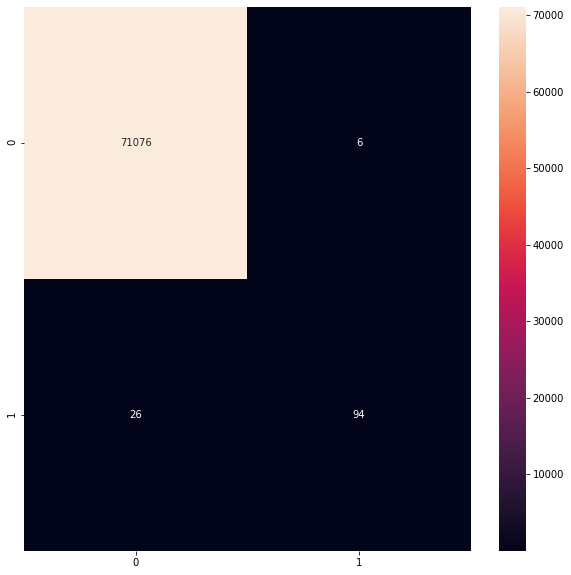

In [32]:
## prediction
pred = rf.predict(x_test)


print('Classification Report: \n', classification_report(y_test, pred))

plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='g');

# random forest is a better model. It has good accuracy.

### Finished